In [43]:
import numba as nb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy.interpolate import griddata
import os
import shutil
import moviepy as mp

In [45]:
SIM_NAME = 'Sim 2'

data = pd.read_csv(f'Output/{SIM_NAME}.csv', header=0)
data

,m,n,o,num_images,pos_rms,mag_rms,chi2,"$z_{s,fid}$",x,y,e,$θ_{e}$,$r_{Ein}$,$\gamma$ (PWI),source_x,source_y
0,1.5,0.0,0.00000,1,0.025585,4.201782e+07,586.3371,1.0,20.80800,20.77525,0.0,0.00000,0.487751,1.5,20.80800,20.77525
1,1.5,0.0,3.63636,1,0.025585,4.201626e+07,586.3371,1.0,20.80800,20.77525,0.0,3.63636,0.487751,1.5,20.80800,20.77525
2,1.5,0.0,14.54545,1,0.025585,4.201619e+07,586.3371,1.0,20.80800,20.77525,0.0,14.54545,0.487751,1.5,20.80800,20.77525
3,1.5,0.0,7.27273,1,0.025585,4.201618e+07,586.3371,1.0,20.80800,20.77525,0.0,7.27273,0.487751,1.5,20.80800,20.77525
4,1.5,0.0,10.90909,1,0.025585,4.201938e+07,586.3371,1.0,20.80800,20.77525,0.0,10.90909,0.487751,1.5,20.80800,20.77525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.5,0.9,352.72727,4,0.865513,3.947450e+00,12902.8800,1.0,20.77509,20.69689,0.9,352.72730,0.575038,2.5,20.80873,20.83445
999996,2.5,0.9,356.36364,4,0.875360,3.943450e+00,2619.6870,1.0,20.79373,20.70017,0.9,356.36360,0.572289,2.5,20.82394,20.83666
999997,2.5,0.9,345.45455,4,0.649474,3.692700e+00,167992.2000,1.0,20.84547,20.70755,0.9,345.45450,0.487254,2.5,20.98001,20.87483
999998,2.5,0.9,360.00000,4,0.882890,3.935500e+00,8420.3500,1.0,20.81777,20.70538,0.9,360.00000,0.569790,2.5,20.84543,20.83776


In [3]:
data['pos_rms'] = data['pos_rms'].fillna(1)
data['mag_rms'] = data['mag_rms'].fillna(6000)

In [27]:
data4 = data[(data['num_images'] == 4)]
pos_sigma = 0.001
mag_sigma = 1
sigma = 7
datagood = data4[(data4['pos_rms'] < sigma*pos_sigma) & (data4['mag_rms'] < sigma*mag_sigma)]
datagood

,m,n,o,num_images,pos_rms,mag_rms,chi2,"$z_{s,fid}$",x,y,e,$θ_{e}$,$r_{Ein}$,$\gamma$ (PWI),source_x,source_y
481496,1.98485,0.12727,356.36364,4,0.006981,5.928625,396.6695,1.0,20.81370,20.75961,0.12727,356.3636,0.490313,1.98485,20.81640,20.78041
491505,1.99495,0.12727,356.36364,4,0.006894,5.869400,391.5933,1.0,20.81373,20.75984,0.12727,356.3636,0.490245,1.99495,20.81641,20.78047
501398,2.00505,0.11818,356.36364,4,0.006788,6.947725,379.9896,1.0,20.81362,20.76143,0.11818,356.3636,0.489807,2.00505,20.81607,20.78026
501499,2.00505,0.12727,356.36364,4,0.006861,5.810100,387.3801,1.0,20.81372,20.76021,0.12727,356.3636,0.490073,2.00505,20.81638,20.78066
511398,2.01515,0.11818,356.36364,4,0.006776,6.892475,378.5862,1.0,20.81366,20.76158,0.11818,356.3636,0.489763,2.01515,20.81609,20.78026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995502,2.50000,0.49091,356.36364,4,0.006454,5.251050,280.7088,1.0,20.80956,20.74362,0.49091,356.3636,0.496943,2.50000,20.81842,20.79837
995598,2.50000,0.50000,356.36364,4,0.006492,5.328525,279.6968,1.0,20.80937,20.74296,0.50000,356.3636,0.497359,2.50000,20.81850,20.79899
995698,2.50000,0.50909,356.36364,4,0.006501,5.402800,279.4177,1.0,20.80920,20.74210,0.50909,356.3636,0.497900,2.50000,20.81860,20.79949
995799,2.50000,0.51818,356.36364,4,0.006507,5.474875,279.9475,1.0,20.80902,20.74142,0.51818,356.3636,0.498312,2.50000,20.81868,20.80012


In [20]:
print(data['$\gamma$ (PWI)'].unique())
data_spes = data[data['$\gamma$ (PWI)'] == 2.36869]

[1.5     1.5101  1.5202  1.5303  1.5404  1.55051 1.56061 1.57071 1.58081
 1.59091 1.60101 1.61111 1.62121 1.63131 1.64141 1.65152 1.66162 1.67172
 1.68182 1.69192 1.70202 1.71212 1.72222 1.73232 1.74242 1.75253 1.76263
 1.77273 1.78283 1.79293 1.80303 1.81313 1.82323 1.83333 1.84343 1.85354
 1.86364 1.87374 1.88384 1.89394 1.90404 1.91414 1.92424 1.93434 1.94444
 1.95455 1.96465 1.97475 1.98485 1.99495 2.00505 2.01515 2.02525 2.03535
 2.04545 2.05556 2.06566 2.07576 2.08586 2.09596 2.10606 2.11616 2.12626
 2.13636 2.14646 2.15657 2.16667 2.17677 2.18687 2.19697 2.20707 2.21717
 2.22727 2.23737 2.24747 2.25758 2.26768 2.27778 2.28788 2.29798 2.30808
 2.31818 2.32828 2.33838 2.34848 2.35859 2.36869 2.37879 2.38889 2.39899
 2.40909 2.41919 2.42929 2.43939 2.44949 2.4596  2.4697  2.4798  2.4899
 2.5    ]


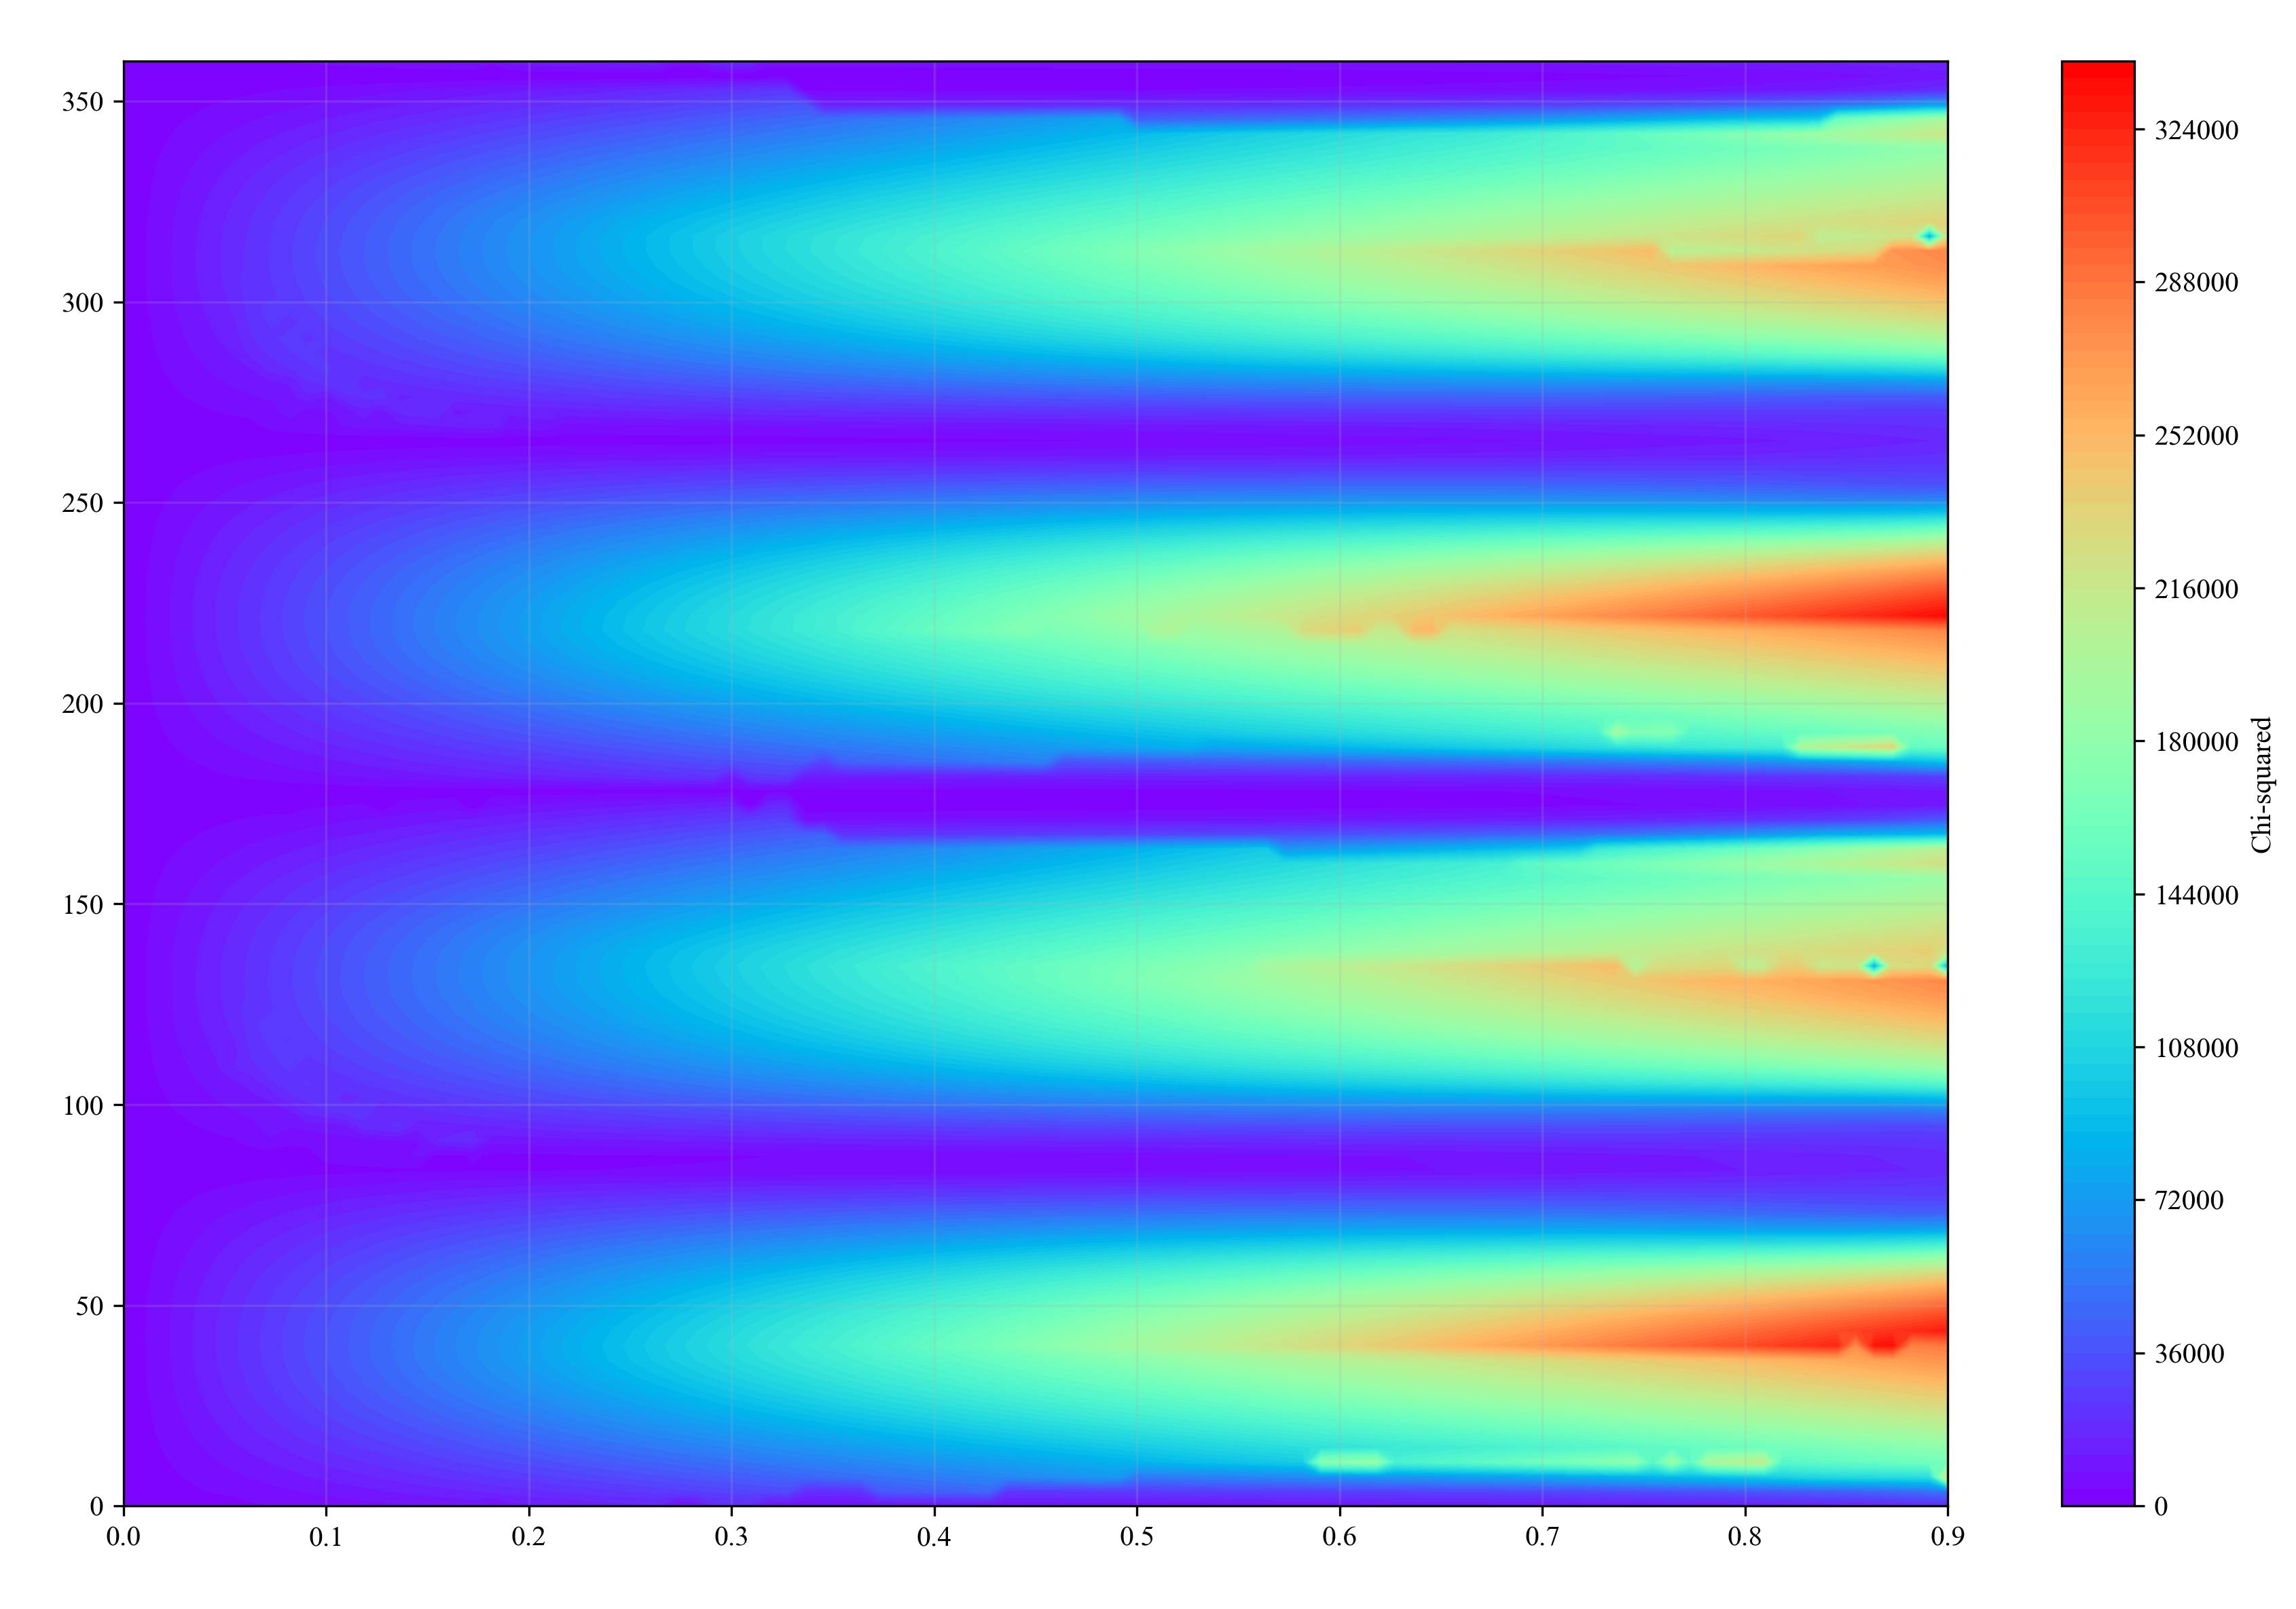

In [18]:
# Create a grid of x and y values
x = data['e'].values
y = data['$θ_{e}$'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'w')
plt.ylabel('$θ_{e}$', color = 'w')
plt.title('Ellipticity v/s PA', color = 'w')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

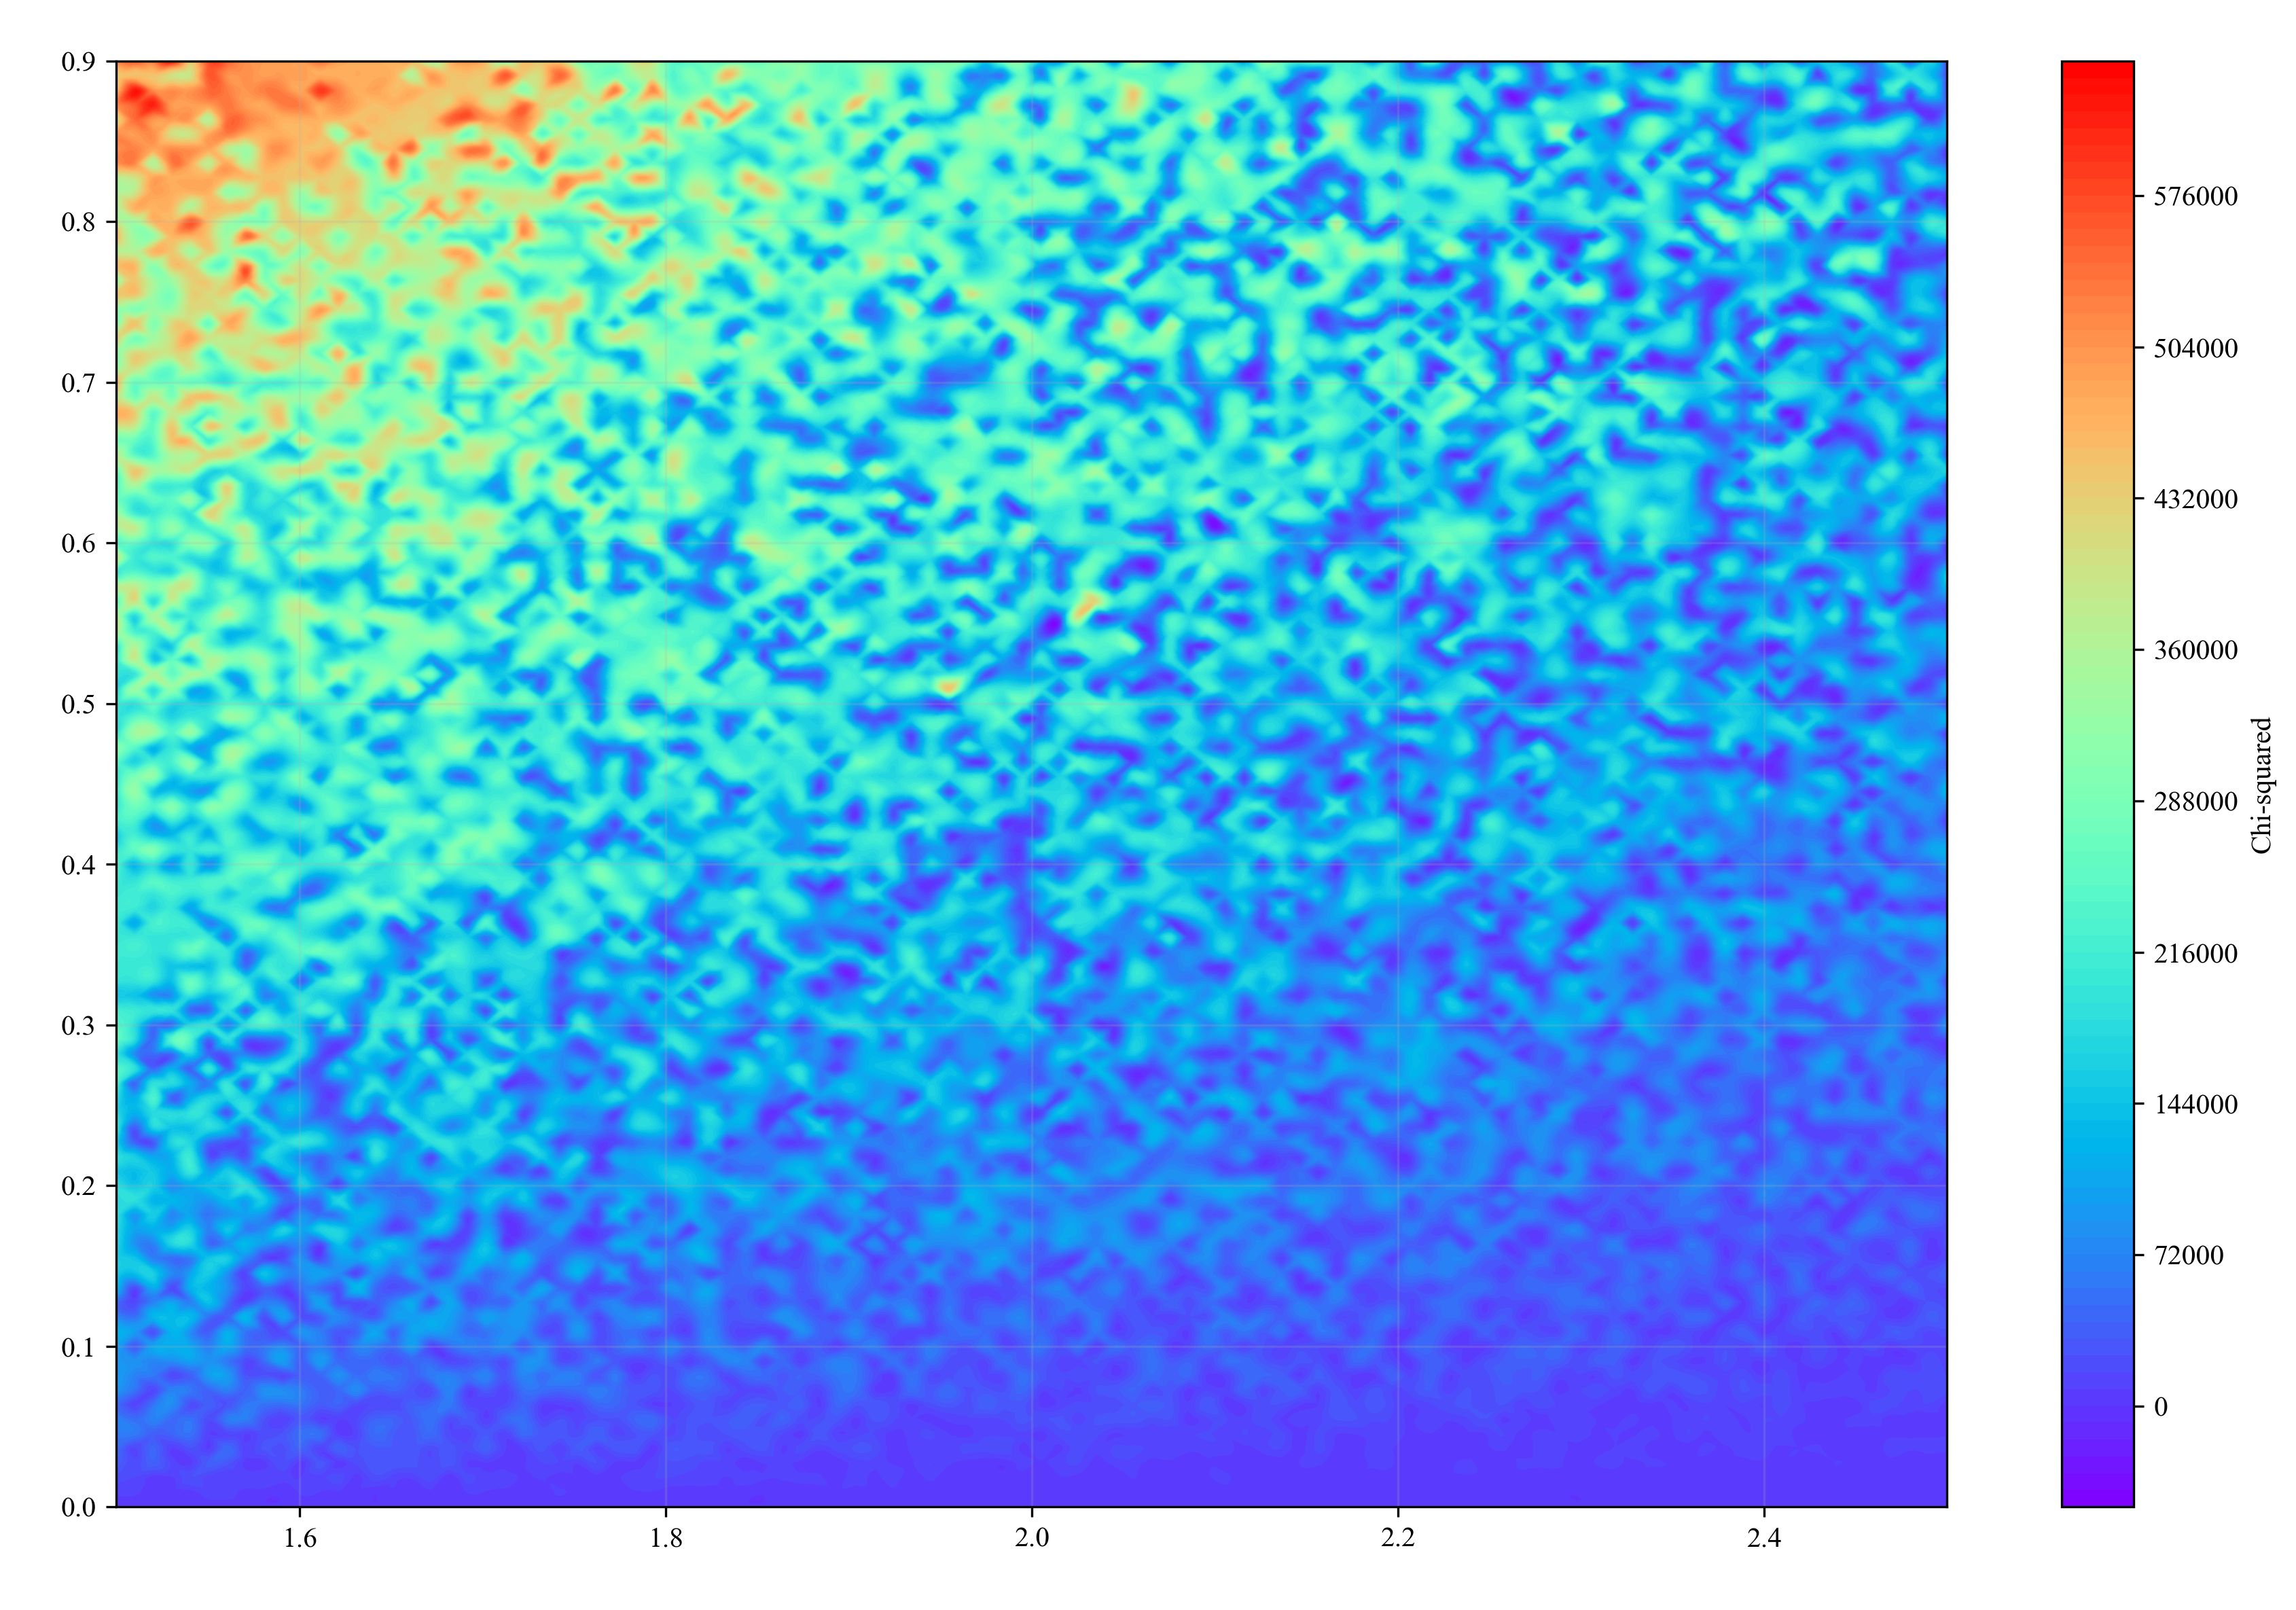

In [ ]:
# Create a grid of x and y values
x = data['m'].values
y = data['n'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'k')
plt.ylabel('$θ_{e}$', color = 'k')
plt.title('Ellipticity v/s PA', color = 'k')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
x_variable = 'e'
y_variable = '$θ_{e}$'
z_variable = '$\gamma$ (PWI)'
color_variable = 'chi2'
variable_to_animate = 'e' # The variable whose unique values will define the frames

fps = 10 # Frames per second for the output video. Adjust for desired speed.
# --- End of Configuration ---


# --- The rest of the code is now general ---

# Create a directory to store the frames
frames_dir = f'frames_3D_{color_variable}_vs_{x_variable}_{y_variable}_{z_variable}_over_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

# Determine global ranges for axes and color to keep the plot consistent
x_min, x_max = data[x_variable].min(), data[x_variable].max()
y_min, y_max = data[y_variable].min(), data[y_variable].max()
z_min, z_max = data[z_variable].min(), data[z_variable].max()
color_min, color_max = data[color_variable].min(), data[color_variable].max()

# Get the unique values to iterate over
values_to_iterate = sorted(data[variable_to_animate].unique())
print(f"Found {len(values_to_iterate)} unique values of '{variable_to_animate}' to animate.")

frame_files = []
print("Generating frames...")

for i, value in enumerate(values_to_iterate):
    # Filter the data to get points ONLY for the current unique value
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's no data for this value
    if data_subset.empty:
        continue

    # --- Create the 3D Plot for the current frame ---
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Create the 3D scatter plot
    scatter = ax.scatter(
        data_subset[x_variable],
        data_subset[y_variable],
        data_subset[z_variable],
        c=data_subset[color_variable],
        cmap='viridis',
        vmin=color_min,
        vmax=color_max,
        s=50 # Marker size
    )

    # Set labels and title dynamically
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel(z_variable)
    ax.set_title(f'{variable_to_animate} = {value:.3f}')

    # Set consistent axis limits for all frames
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    # Add a color bar
    cbar = fig.colorbar(scatter, shrink=0.7)
    cbar.set_label(color_variable)

    # Set a consistent viewing angle
    ax.view_init(elev=25., azim=45)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close(fig)  # Close the plot to free memory
    frame_files.append(frame_path)

print(f"Generated {len(frame_files)} frames.")

# Create the video from the frames
if frame_files:
    video_filename = f'{SIM_NAME}_{color_variable}_vs_{x_variable}_{y_variable}_{z_variable}_over_{variable_to_animate}.mp4'
    clip = mp.ImageSequenceClip(frame_files, fps=fps)
    clip.write_videofile(video_filename, codec='libx264')
    print(f"\nVideo saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated, so no video was created.")

Found 100 unique values of 'e' to animate.
Generating frames...
Generated 100 frames.
MoviePy - Building video Sim 2_chi2_vs_e_$θ_{e}$_$\gamma$ (PWI)_over_e.mp4.
MoviePy - Writing video Sim 2_chi2_vs_e_$θ_{e}$_$\gamma$ (PWI)_over_e.mp4



MoviePy - Done !
MoviePy - video ready Sim 2_chi2_vs_e_$θ_{e}$_$\gamma$ (PWI)_over_e.mp4

Video saved as Sim 2_chi2_vs_e_$θ_{e}$_$\gamma$ (PWI)_over_e.mp4


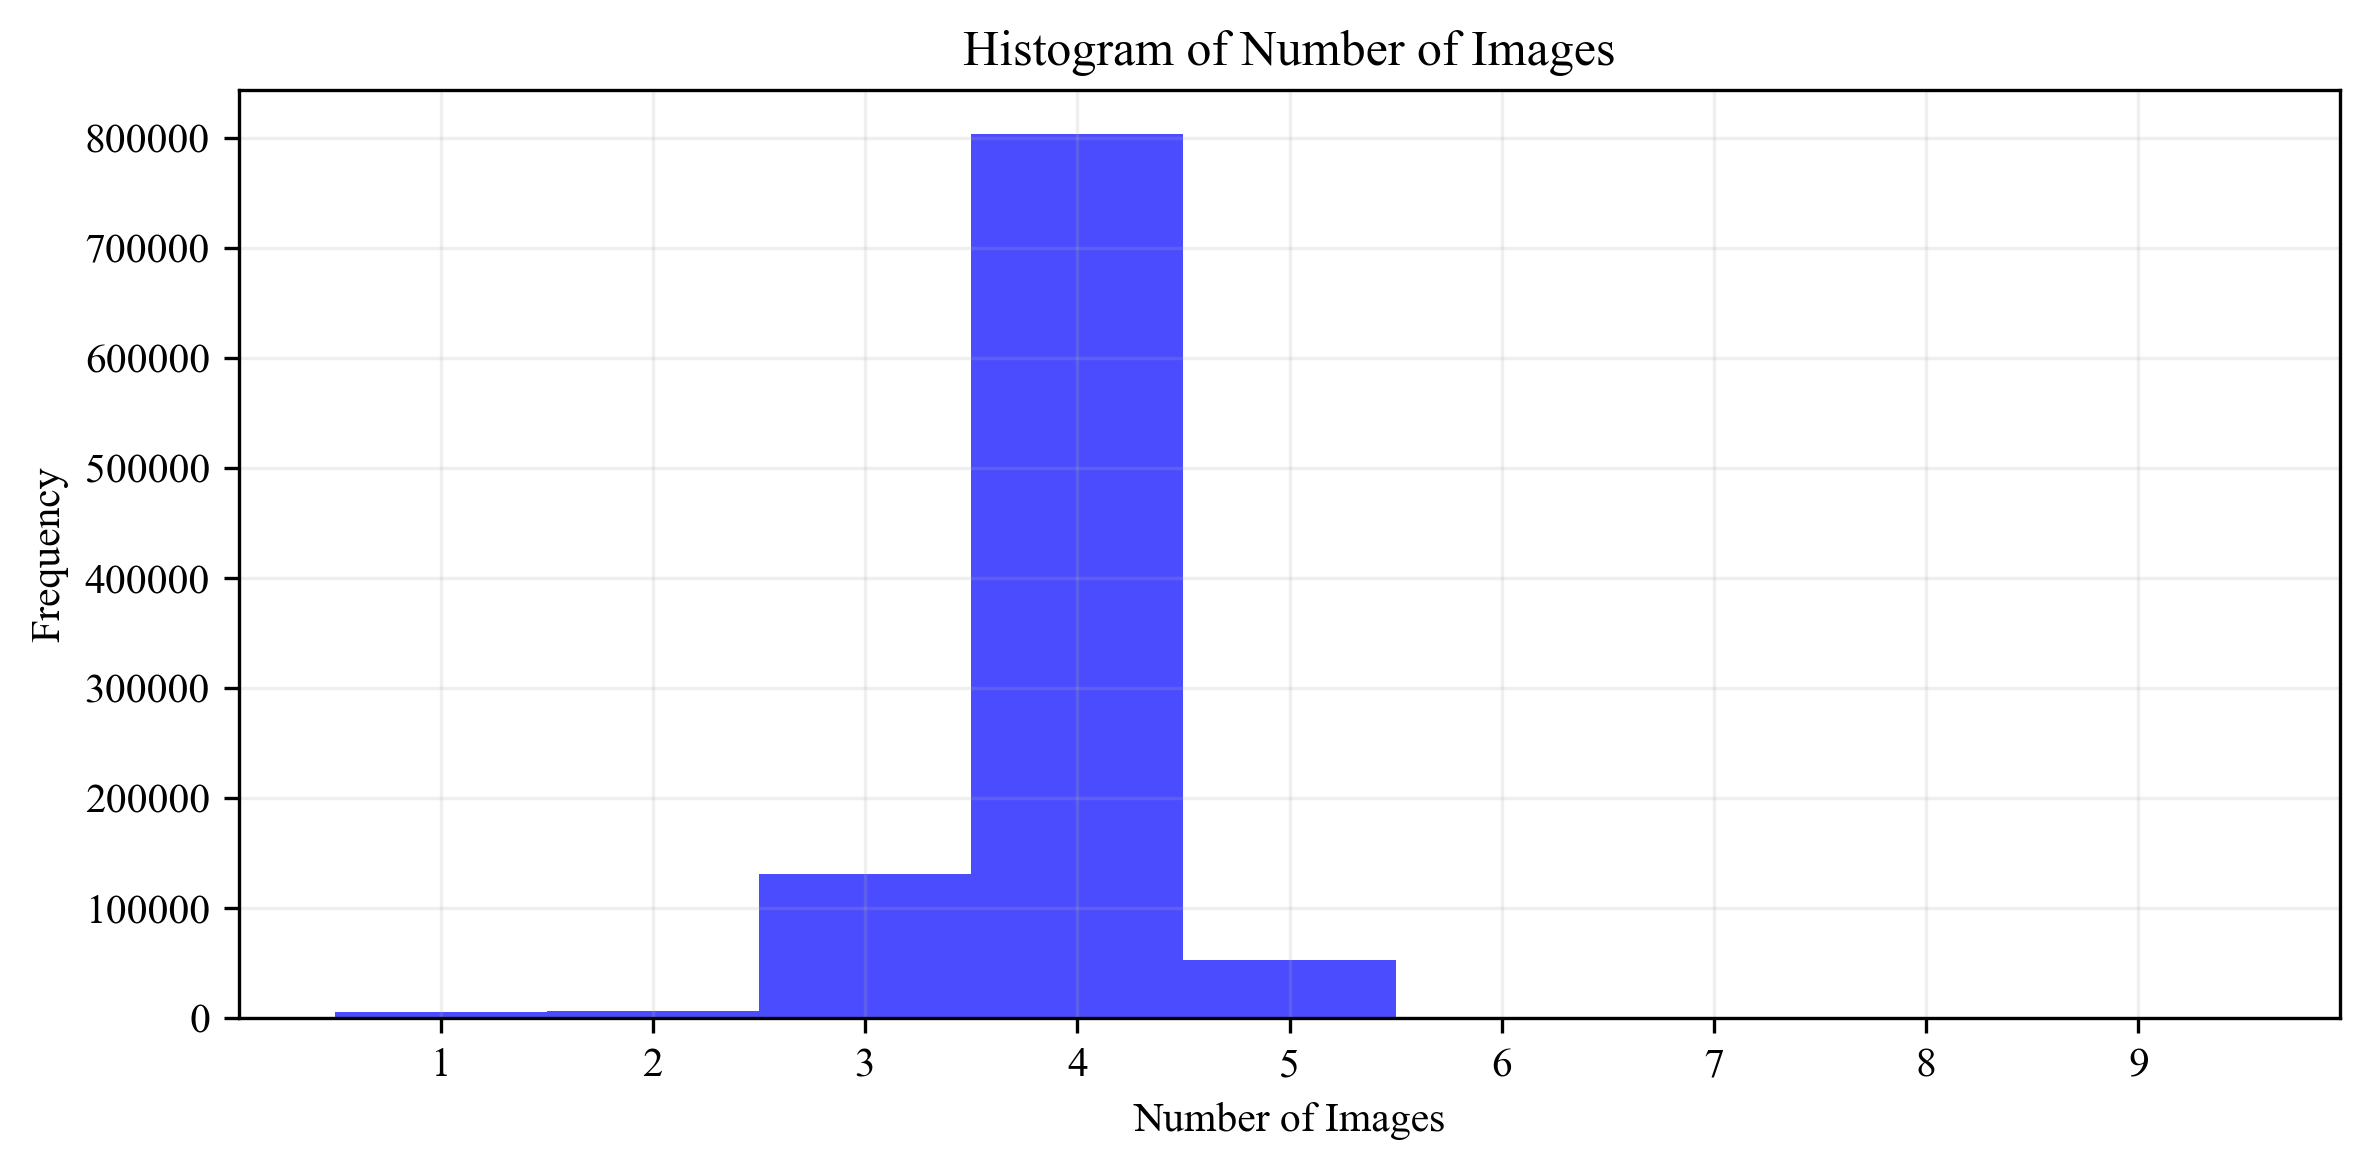

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(data['num_images'], bins=range(1, 11), align='left', color='blue', alpha=0.7)
plt.xticks(range(1, 10))
plt.title('Histogram of Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

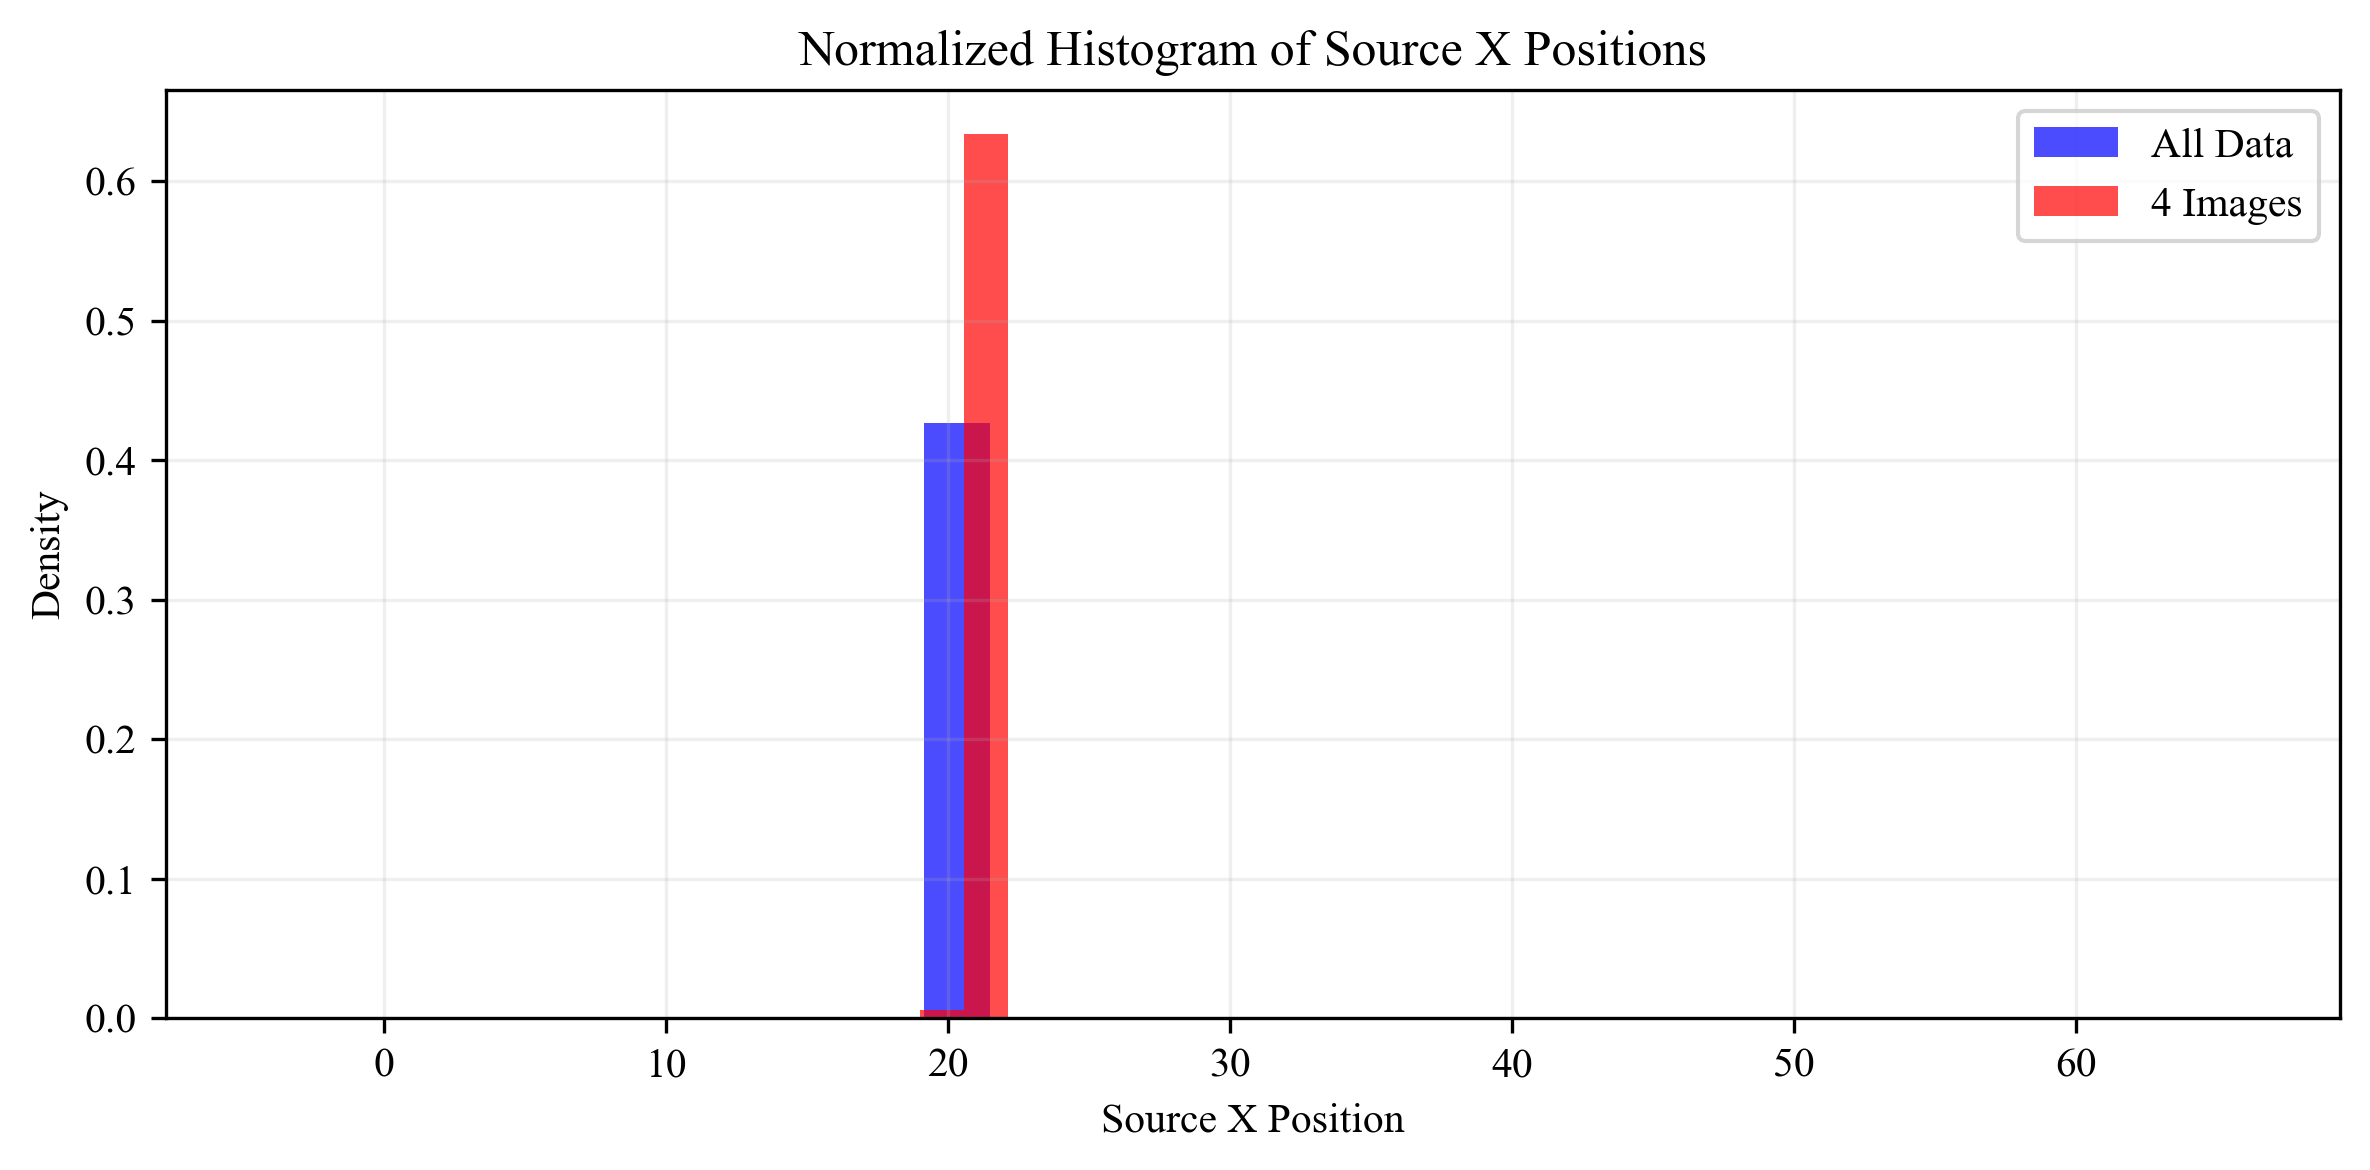

In [38]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_x'], bins=30, color='blue', alpha=0.7, label='All Data', density=True)
plt.hist(data4['source_x'], bins=30, color='red', alpha=0.7, label='4 Images', density=True)
# plt.hist(datagood['source_x'], bins=30, color='green', alpha=0.7, label='Good Data', density=True)
plt.title('Normalized Histogram of Source X Positions')
plt.xlabel('Source X Position')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

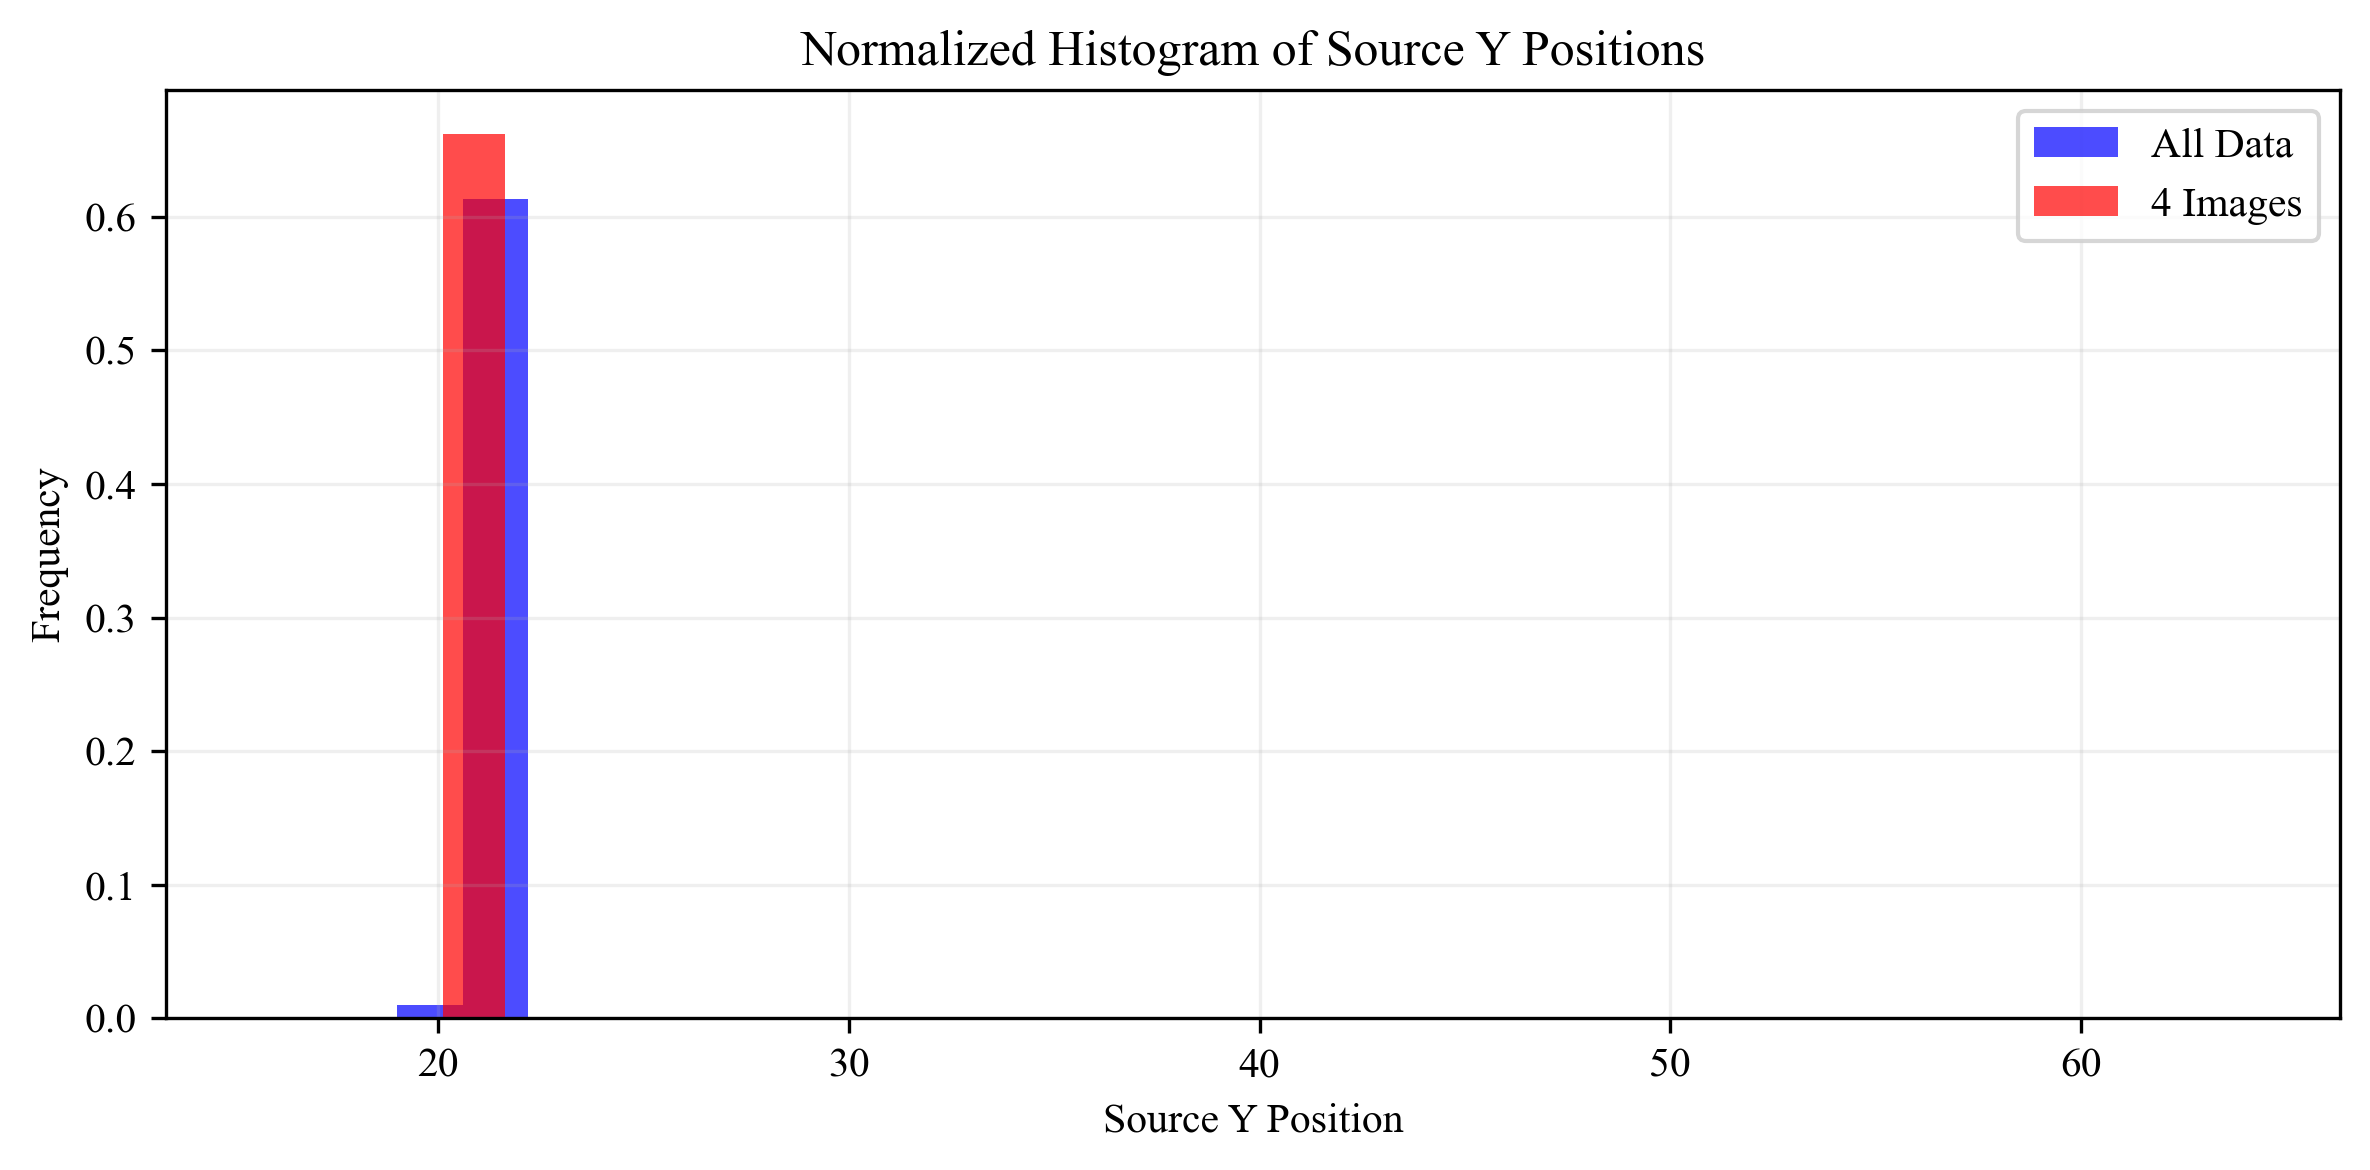

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_y'], bins=30, color='blue', alpha=0.7, density=True, label='All Data')
plt.hist(data4['source_y'], bins=30, color='red', alpha=0.7, density=True, label='4 Images')
# plt.hist(datagood['source_y'], bins=30, color='green', alpha=0.7, density=True, label='Good Data')
plt.title('Normalized Histogram of Source Y Positions')
plt.xlabel('Source Y Position')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [54]:
# Select the variable to iterate over for the animation
variable_to_animate = 'e'

# Select the variable to plot the KDE for
variable_to_plot = 'source_y' # e.g., 'pos_rms', 'mag_rms', 'chi2'

# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_kde_{variable_to_plot}_vs_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values = sorted(data[variable_to_animate].unique())

# Determine the global range for the plotted variable to keep the x-axis consistent
plot_var_min = data[variable_to_plot].min()
plot_var_max = data[variable_to_plot].max()

for i, value in enumerate(values):
    # Filter data for the current value of the chosen animation variable
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's not enough data
    if data_subset.empty:
        continue

    plt.figure(figsize=(8, 4))
    sns.kdeplot(data_subset[variable_to_plot], fill=True)
    
    # Set labels and a dynamic title
    plt.title(f'KDE of {variable_to_plot} for {variable_to_animate} = {value:.2f}')
    plt.xlabel(variable_to_plot)
    plt.ylabel('Density')
    plt.xlim(20.5, 21.2) # Keep x-axis consistent
    # plt.ylim(0, 4.0) # Let y-axis adjust automatically
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Slower fps for better viewing
    video_filename = f'{SIM_NAME}_kde_{variable_to_plot}_vs_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim 2_kde_source_y_vs_e_animation.mov.
MoviePy - Writing video Sim 2_kde_source_y_vs_e_animation.mov



MoviePy - Done !
MoviePy - video ready Sim 2_kde_source_y_vs_e_animation.mov
Video saved as Sim 2_kde_source_y_vs_e_animation.mov
